## Загрузка данных

От целого датасета kaggle крашится. Загружаю пробный кусок

In [ ]:
import os
import pandas as pd
import cv2
import json
import matplotlib.pyplot as plt


imgs = []
path = "/kaggle/input/benetech-making-graphs-accessible/train/images"
i = 0
for label in os.listdir(path):
    if i > 10:
        break
    image = cv2.imread(os.path.join(path, label))
    if image is not None:
        imgs.append(image)
    i += 1

In [ ]:
annts = []
path = "/kaggle/input/benetech-making-graphs-accessible/train/annotations"
i = 0
for annt_name in os.listdir(path):
    if i > 10:
        break
    with open(os.path.join(path, annt_name)) as f:
        annotation = json.loads(f.read())

    x_axis_annotations = [annotation["data-series"][i]['x'] for i in range(len(annotation["data-series"]))]

    if x_axis_annotations is not None:
        annts.append(x_axis_annotations)
    i += 1

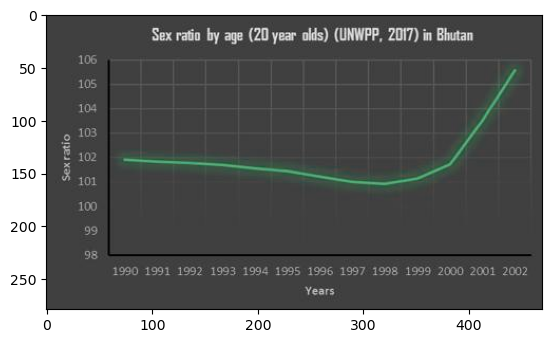

In [ ]:
plt.imshow(imgs[0])

Пробная картинка и аннотация из бейзлайна

In [ ]:
# import cv2
# import json
# import numpy as np
# import matplotlib.pyplot as plt
# from pprint import pprint

# sample_image = "/kaggle/input/benetech-making-graphs-accessible/train/images/00c73795f795.jpg"
# image = cv2.imread(sample_image)
# sample_annotation = "/kaggle/input/benetech-making-graphs-accessible/train/annotations/00c73795f795.json"

# images = "/kaggle/input/benetech-making-graphs-accessible/train/images"
# annots = "/kaggle/input/benetech-making-graphs-accessible/train/annotations"

# with open(sample_annotation) as f:
#     annotation = json.loads(f.read())

# plt.imshow(image)

# x_axis_annotations = [annotation["data-series"][i]['x'] for i in range(len(annotation["data-series"]))]
# print("\n", "x-axis annotations: ", x_axis_annotations, "\n")

## OCR - часть

In [ ]:
import easyocr
import pandas as pd

reader = easyocr.Reader(['en'])
ocr_preds = []

for i in range(0, len(imgs)):
    ocr_preds.append(reader.readtext(imgs[i]))

### **Install neuspell**

In [ ]:
!git lfs install
!git clone https://huggingface.co/pszemraj/neuspell-subwordbert-probwordnoise

Error: Failed to call git rev-parse --git-dir: exit status 128 
Git LFS initialized.
Cloning into 'neuspell-subwordbert-probwordnoise'...
remote: Enumerating objects: 40, done.
remote: Total 40 (delta 0), reused 0 (delta 0), pack-reused 40
Unpacking objects: 100% (40/40), 5.36 KiB | 392.00 KiB/s, done.
Filtering content: 100% (3/3), 2.75 GiB | 64.31 MiB/s, done.


In [ ]:
!pip install -U neuspell -q

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
aiobotocore 2.4.2 requires botocore<1.27.60,>=1.27.59, but you have botocore 1.29.165 which is incompatible.


## Spell Correction часть

In [ ]:
from neuspell import BertChecker
checker = BertChecker()
checker.from_pretrained("./neuspell-subwordbert-probwordnoise/")

data folder is set to `/opt/conda/lib/python3.7/site-packages/neuspell/../data` script


loading vocab from path:./neuspell-subwordbert-probwordnoise/vocab.pkl
initializing model


Some weights of the model checkpoint at bert-base-cased were not used when initializing BertModel: ['cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


SubwordBert(
  (bert_dropout): Dropout(p=0.2, inplace=False)
  (bert_model): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(28996, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0): BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): 

#### Проверим работу предобученной модели для 10 графиков

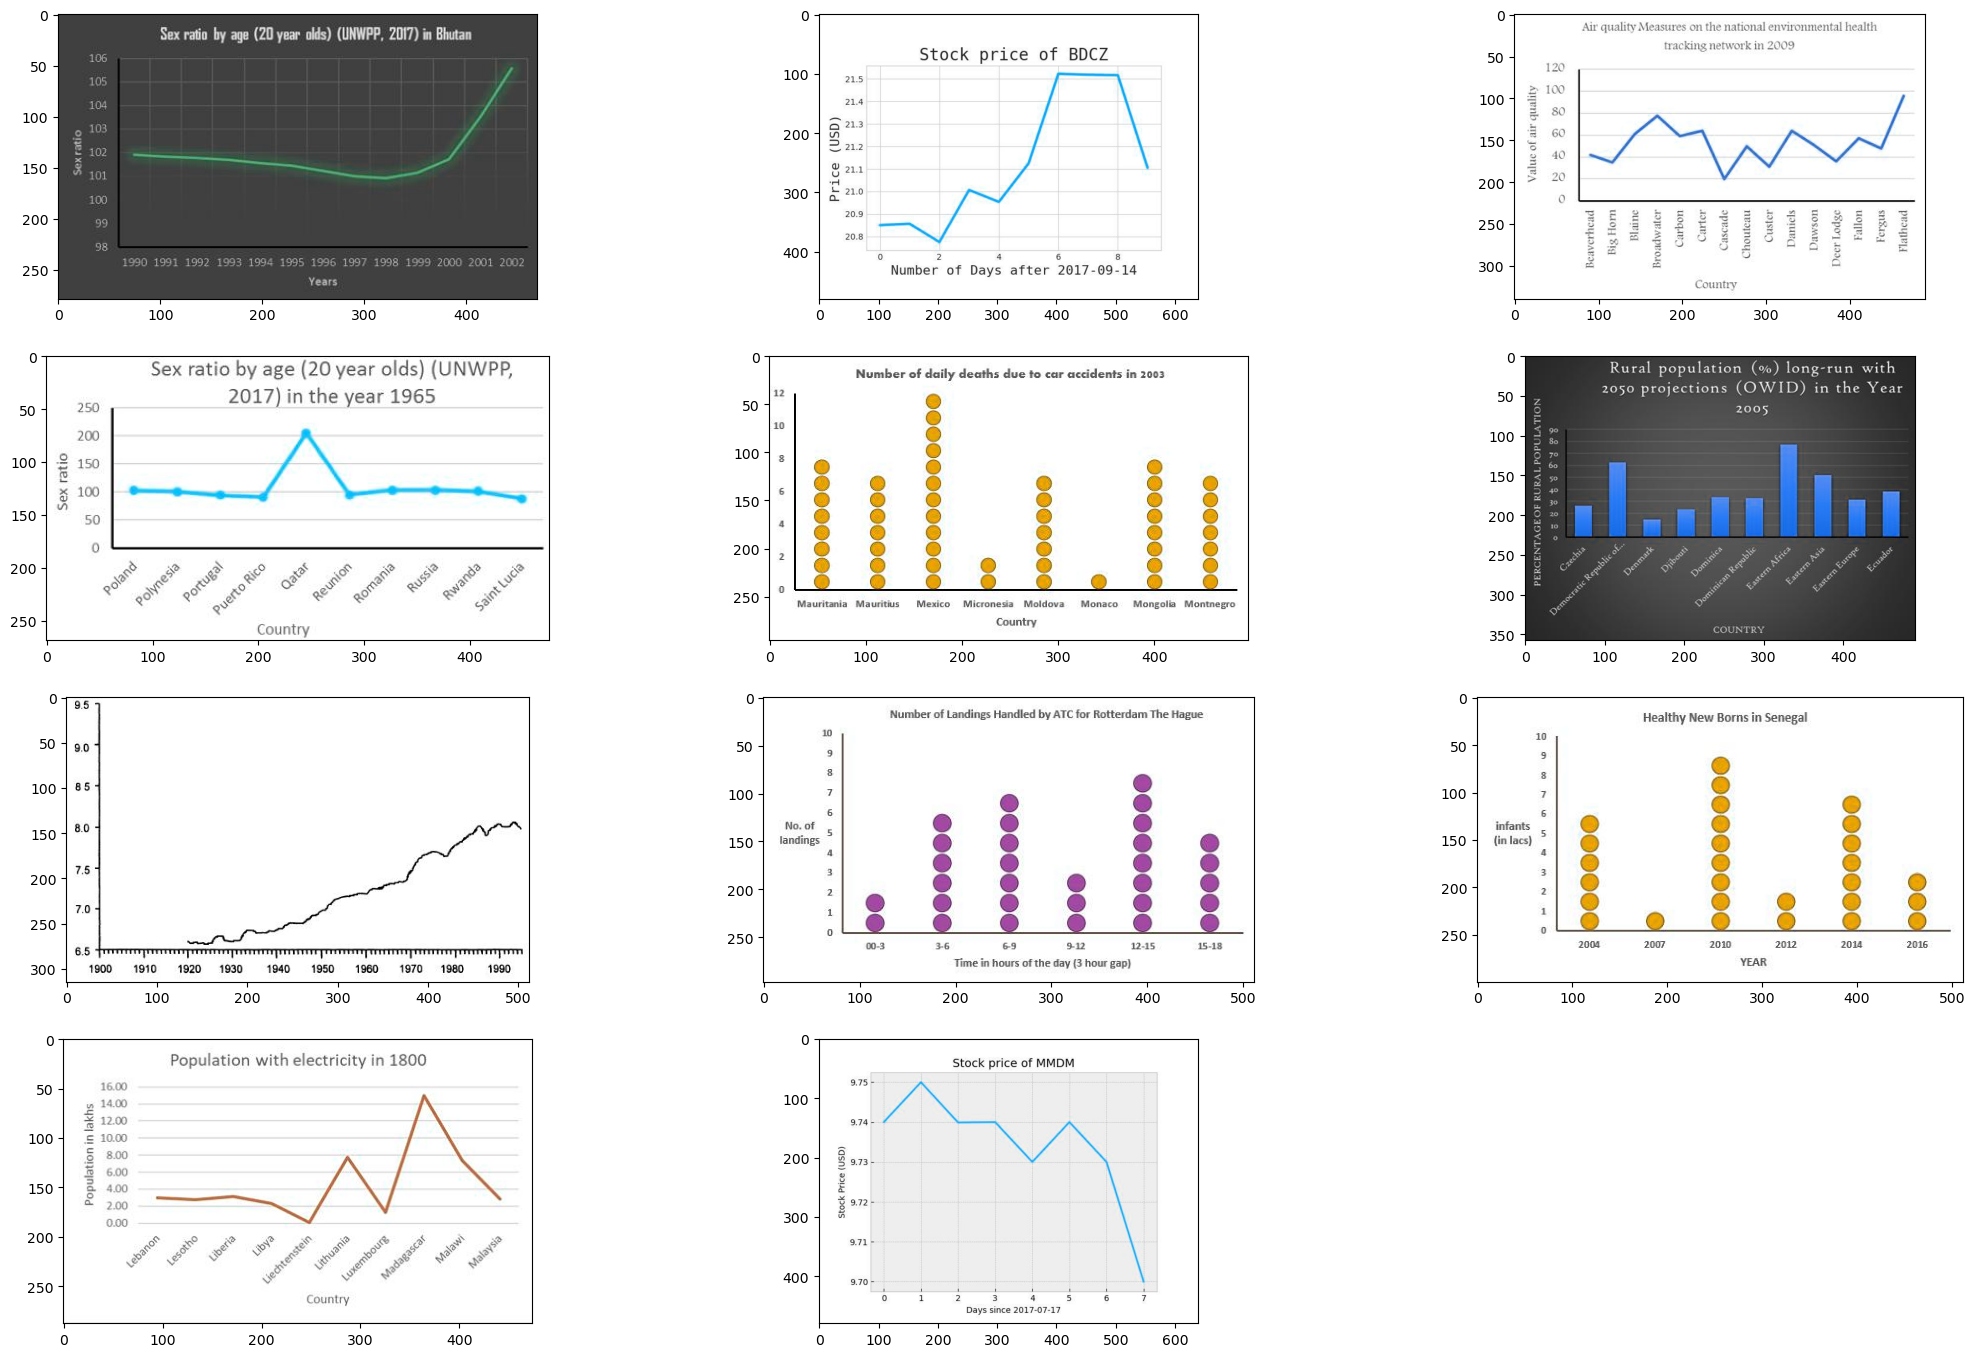

In [ ]:
plt.figure(figsize = (26,17))
sub = 1
for i in range(len(imgs)):
    plt.subplot(4,3,sub)
    plt.imshow(imgs[i])
    sub+=1

In [ ]:
# индексы ocr_preds:
# i - номер графика, j - номер прочитанного элемента,
# 1 - прочитанный текст (0 - коорд. бокса, 2 - вероятность)

for i in range(len(ocr_preds)):
    before_spell_check = [ocr_preds[i][j][1]  for j in range(len(ocr_preds[i]))]
    print(i  , ") Before: ", before_spell_check, '\n')
    after_spell_check = checker.correct_strings([ocr_preds[i][j][1]  for j in range(len(ocr_preds[i]))])
    print(i , ") After: ", after_spell_check, '\n')
    print("-" * 120)

0 ) Before:  ['Sex ratio by age (20 year olds) (UNWPP , 2017) in Bhutan', '106', '105', '104', '103', 'J', '102', '101', '100', '1990 1991 1992', '1993 1994 1995 1996 1997 1998 1999,2000 2001 2002', 'Years'] 

0 ) After:  ['Sex ratio by age ( 20 year olds ) ( UNWPP , 2017 ) in Bhutan', '106', '105', '104', '103', 'J', '102', '101', '100', '1990 1991 1992', '1993 1994 1995 1996 1997 1998 1999 , 2000 2001 2002', 'Years'] 

------------------------------------------------------------------------------------------------------------------------
1 ) Before:  ['Stock price of', 'BDCZ', '21.5', '21.4', '21.3', '8', '21.2', '21.1', '2', '21.0', '20.9', '20.8', 'Number', 'of Days', 'after', '2017-09-14'] 

1 ) After:  ['Stock price of', 'BDCZ', '21 . 5', '21 . 4', '21 . 3', '8', '21 . 2', '21 . 1', '2', '21 . 0', '20 . 9', '20 . 8', 'Number', 'of Days', 'after', '2017 - 09 - 14'] 

-------------------------------------------------------------------------------------------------------------------